In [2]:
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Fake data

In [36]:
n_examples = 1000

citationIds = ['citation%s'%id for id in range(n_examples)]
latitudes =  [39.299236 + random.rand() - 0.5 for _ in range(n_examples)]
longitudes = [-76.609383 + random.rand() -0.5 for _ in range(n_examples)]
political_neigh = random.choice(['North', 'Northeast', 'East', 'Southeast', 
                                 'South', 'Southwest', 'West', 'Northwest', 'Central'],n_examples)

bmoreZips = [21201, 21202, 21203, 21205, 21206, 
             21209, 21210, 21211, 21212, 21213, 
             21214, 21215, 21216, 21217, 21218, 
             21223, 21224, 21229, 21230, 21231, 
             21233, 21235, 21239, 21241, 21251, 
             21263, 21264, 21270, 21273, 21275, 
             21278, 21279, 21280, 21281, 21287, 
             21288, 21289, 21290, 21297, 21298]
zipcodes = [str(random.choice(bmoreZips)) for _ in range(n_examples)]

current_balance = random.randint(75,150,n_examples)

In [11]:
df = pd.DataFrame({'citationId':citationIds,
                   'latitude':latitudes,
                   'longitude':longitudes,
                  'political_neighborhood':political_neigh,
                  'zipcode':zipcodes,
                  'balance':current_balance})
df.head()

,balance,citationId,latitude,longitude,political_neighborhood,zipcode
0,100,citation0,39.296687,-76.376014,Northwest,21264
1,98,citation1,39.258185,-76.794852,South,21230
2,76,citation2,39.360320,-76.264458,Central,21275
3,120,citation3,38.821104,-76.367387,Central,21233
4,131,citation4,39.343000,-76.381391,North,21263


### Real data

In [70]:
filename = 'geocode-sep-15-1234.txt'
!head {filename}

62756409	null	null	Downtown	419	West Redwood Street	21201	7003	null	Central	012	No Stopping/Standing Not Tow-Away Zone	2018-02-04T09:55:00	32.00
62756417	null	null	Downtown	1420	North Charles Street	21201	null	null	Central	099	All Other Stopping or Parking Violations	2018-02-04T10:01:00	32.00
62756433	null	null	Downtown	null	East Mount Vernon Place	21202	null	null	Central	012	No Stopping/Standing Not Tow-Away Zone	2018-02-04T10:15:00	32.00
62756441	39.287318	-76.626216	Downtown	700	West Lombard Street	21201	null	Penn Street	Central	008	No Stopping/Standing Tow Away Zone	2018-02-04T10:29:00	52.00
62756458	39.297446	-76.617617	Downtown	105	West Monument Street	21201	4701	null	Central	012	No Stopping/Standing Not Tow-Away Zone	2018-02-04T10:41:00	32.00
62757704	39.285519	-76.590076	Fells Point	505	South Wolfe Street	21231	3009	null	Southeastern	046	No Parking/Standing In Bus Stop/Bus Lane	2018-02-04T15:59:00	252.00
62757712	39.285519	-76.590076	Fells Point	505	South Wolfe Street	21231	300

In [75]:
names=['citationId','latitude','longitude','hood',
       'number','street','zipcode','zip_suffix',
       'landmark','district','violation_code','description',
      'violation_date','balance']
dtypes=[str,float,float,str,
        str,str,str,str,
        str,str,str,str,
        str,float]
df = pd.read_csv(filename,sep='\t',names=names)
df.dtypes

citationId          int64
latitude           object
longitude          object
hood               object
number             object
street             object
zipcode             int64
zip_suffix         object
landmark           object
district           object
violation_code      int64
description        object
violation_date     object
balance           float64
dtype: object

In [76]:
df.head()

,citationId,latitude,longitude,hood,number,street,zipcode,zip_suffix,landmark,district,violation_code,description,violation_date,balance
0,62756409,null,null,Downtown,419,West Redwood Street,21201,7003,null,Central,12,No Stopping/Standing Not Tow-Away Zone,2018-02-04T09:55:00,32.0
1,62756417,null,null,Downtown,1420,North Charles Street,21201,null,null,Central,99,All Other Stopping or Parking Violations,2018-02-04T10:01:00,32.0
2,62756433,null,null,Downtown,null,East Mount Vernon Place,21202,null,null,Central,12,No Stopping/Standing Not Tow-Away Zone,2018-02-04T10:15:00,32.0
3,62756441,39.287318,-76.626216,Downtown,700,West Lombard Street,21201,null,Penn Street,Central,8,No Stopping/Standing Tow Away Zone,2018-02-04T10:29:00,52.0
4,62756458,39.297446,-76.617617,Downtown,105,West Monument Street,21201,4701,null,Central,12,No Stopping/Standing Not Tow-Away Zone,2018-02-04T10:41:00,32.0


### Processing

In [77]:
pn_df = df.groupby('hood',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
pn_df.columns = ["_".join(x) for x in pn_df.columns.ravel()]
pn_df.head()

,hood_,balance_mean,balance_sum,citationId_count
0,Abell,35.000000,700.0,20
1,Allendale,47.500000,665.0,14
2,Arlington,55.846154,726.0,13
3,Armistead Gardens,30.833333,185.0,6
4,Ashburton,22.166667,133.0,6


### Citation count analysis

In [78]:
pn_df = pn_df.sort_values('citationId_count',ascending=False)
pn_df.head()

,hood_,balance_mean,balance_sum,citationId_count
53,Downtown,32.244705,71551.0,2219
42,Claremont - Freedom,0.000000,0.0,1161
156,Morrell Park,6.822515,6727.0,986
64,Edmondson Village,0.263759,254.0,963
175,Panway - Braddish,0.627700,494.0,787


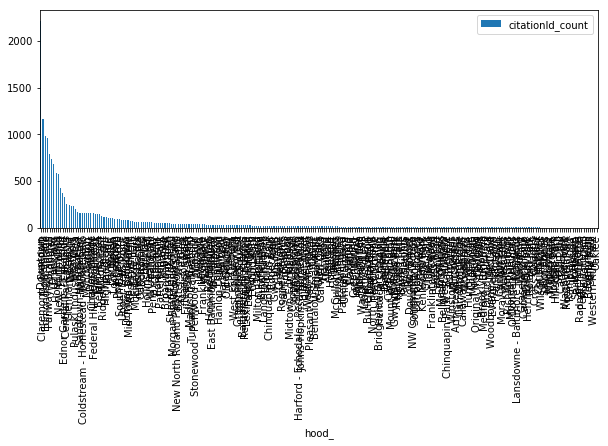

In [79]:
pn_df.plot(x='hood_', y='citationId_count', kind='bar',figsize=(10,4))

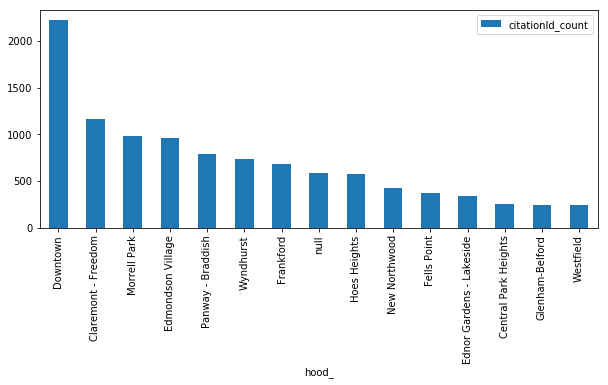

In [80]:
pn_df.head(15).plot(x='hood_', y='citationId_count', kind='bar',figsize=(10,4))

### Balance analysis

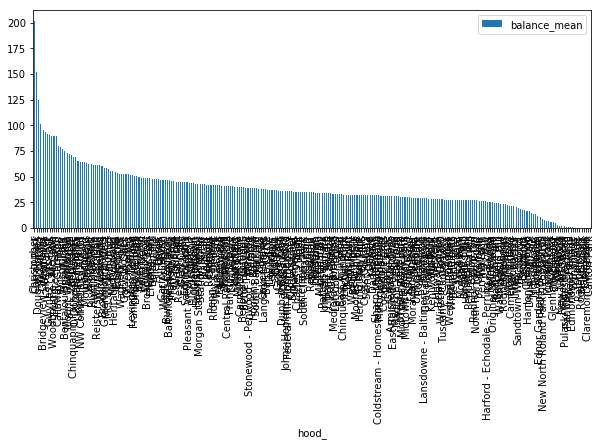

In [81]:
pn_df = pn_df.sort_values('balance_mean',ascending=False)
pn_df.plot(x='hood_', y='balance_mean', kind='bar',figsize=(10,4))

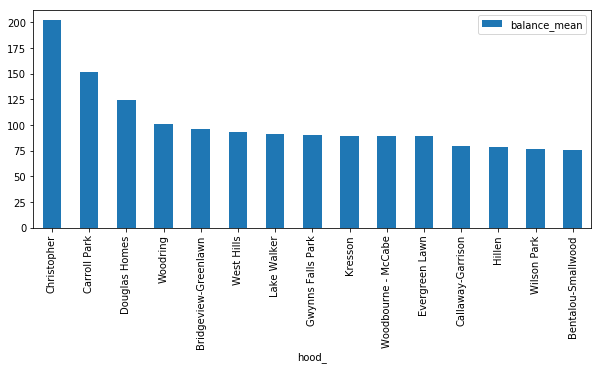

In [82]:
pn_df.head(15).plot(x='hood_', y='balance_mean', kind='bar',figsize=(10,4))

### Analysis by zip code

In [83]:
zip_df = df.groupby('zipcode',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
zip_df.columns = ["_".join(x) for x in zip_df.columns.ravel()]
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
0,21201,35.234903,58349.0,1656
1,21202,31.839562,49415.0,1552
2,21204,29.111111,786.0,27
3,21205,19.264414,9690.0,503
4,21206,6.313369,5903.0,935


In [84]:
zip_df = zip_df.sort_values('citationId_count',ascending=False)
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
0,21201,35.234903,58349.0,1656
1,21202,31.839562,49415.0,1552
11,21213,7.137322,10499.0,1471
21,21223,11.636364,15104.0,1298
27,21229,8.375732,10009.0,1195


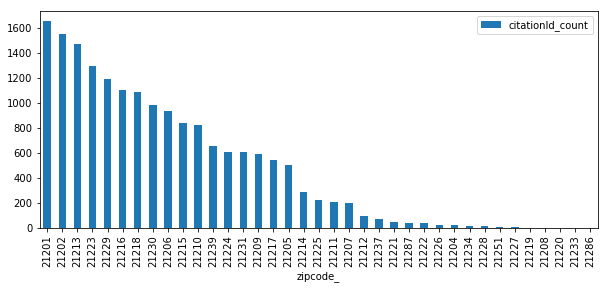

In [85]:
zip_df.plot(x='zipcode_', y='citationId_count', kind='bar',figsize=(10,4))

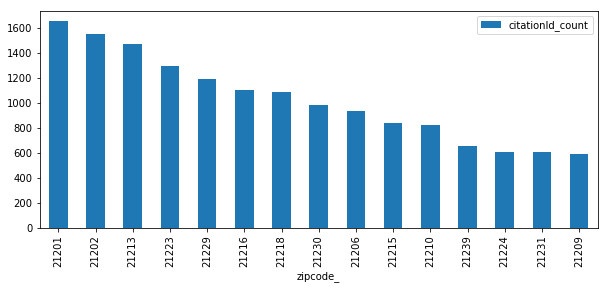

In [86]:
zip_df.head(15).plot(x='zipcode_', y='citationId_count', kind='bar',figsize=(10,4))

In [87]:

zip_df = zip_df.sort_values('balance_mean',ascending=False)
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
30,21233,102.000000,102.0,1
18,21220,89.500000,179.0,2
34,21251,55.333333,498.0,9
26,21228,52.800000,792.0,15
24,21226,49.178571,1377.0,28


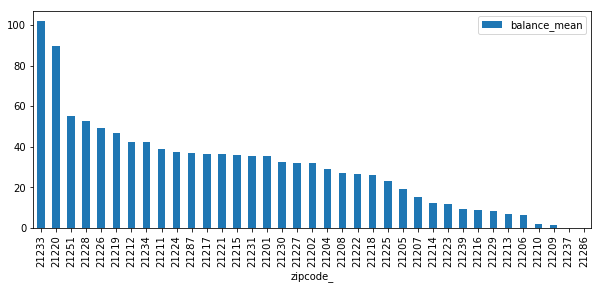

In [88]:
zip_df.plot(x='zipcode_', y='balance_mean', kind='bar',figsize=(10,4))

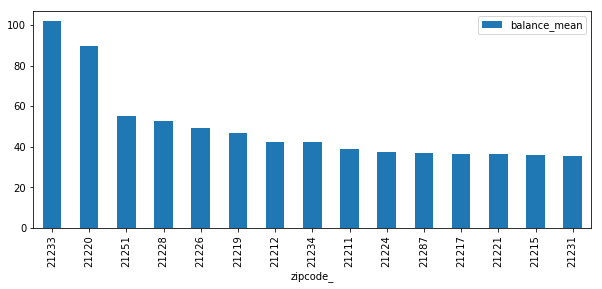

In [89]:
zip_df.head(15).plot(x='zipcode_', y='balance_mean', kind='bar',figsize=(10,4))

In [90]:
badzips = df[~df['zipcode'].isin(bmoreZips)]['zipcode'].unique()
badzips.sort()
print(badzips)

[21204 21207 21208 21219 21220 21221 21222 21225 21226 21227 21228 21234
 21237 21286]
